# **Librerías y revisión inicial**

In [1]:
#Importar librería pandas y leer datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/patri/challenge_ntt/dataset_SCL.csv", sep = ',', low_memory = False)

In [2]:
#Verificar primeros datos
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [3]:
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [4]:
#Visualizar tipo de datos
df.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [5]:
#Describir datos numéricos
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [6]:
#Fechas a formato correcto
df["Fecha_I2"] = pd.to_datetime(df['Fecha-I'], format="%Y-%m-%d %H:%M:%S")
df["Fecha_O2"] = pd.to_datetime(df['Fecha-O'], format="%Y-%m-%d %H:%M:%S")

In [7]:
df.dtypes

Fecha-I              object
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O              object
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
Fecha_I2     datetime64[ns]
Fecha_O2     datetime64[ns]
dtype: object

In [8]:
#Retraso en días
df["Retraso"] = (df["Fecha_O2"] - df["Fecha_I2"]) / np.timedelta64(1, 'D')

In [9]:
#Corroboro el cálculo de retraso
df[df["Fecha_O2"] < df["Fecha_I2"]][["Retraso","Fecha_O2","Fecha_I2"]]

,Retraso,Fecha_O2,Fecha_I2
4,-0.001389,2017-01-05 23:28:00,2017-01-05 23:30:00
6,-0.003472,2017-01-07 23:25:00,2017-01-07 23:30:00
7,-0.003472,2017-01-08 23:25:00,2017-01-08 23:30:00
10,-0.006250,2017-01-14 23:21:00,2017-01-14 23:30:00
12,-0.004861,2017-01-18 23:23:00,2017-01-18 23:30:00
...,...,...,...
68181,-0.001389,2017-12-03 16:14:00,2017-12-03 16:16:00
68183,-0.004167,2017-12-17 16:10:00,2017-12-17 16:16:00
68192,-0.003472,2017-12-29 04:00:00,2017-12-29 04:05:00
68195,-0.002778,2017-12-23 04:01:00,2017-12-23 04:05:00


In [10]:
#Corroboro el cálculo de retraso
df[df["Fecha_O2"] > df["Fecha_I2"]][["Retraso","Fecha_O2","Fecha_I2"]]

,Retraso,Fecha_O2,Fecha_I2
0,0.002083,2017-01-01 23:33:00,2017-01-01 23:30:00
1,0.006250,2017-01-02 23:39:00,2017-01-02 23:30:00
2,0.006250,2017-01-03 23:39:00,2017-01-03 23:30:00
3,0.002083,2017-01-04 23:33:00,2017-01-04 23:30:00
5,0.023611,2017-01-07 00:04:00,2017-01-06 23:30:00
...,...,...,...
68201,0.031944,2017-12-22 15:41:00,2017-12-22 14:55:00
68202,0.011111,2017-12-25 15:11:00,2017-12-25 14:55:00
68203,0.027778,2017-12-27 15:35:00,2017-12-27 14:55:00
68204,0.009028,2017-12-29 15:08:00,2017-12-29 14:55:00


# **1) ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?**

In [11]:
############################ Distribución de los Datos ################################33
#Descripción de los datos por VLO-I
df.groupby(by = ["Vlo-I"]).count()  
#Existen 584 tipos de vuelos distintos según el código de vuelo

,Fecha-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Fecha_I2,Fecha_O2,Retraso
Vlo-I,,,,,,,,,,,,,,,,,,,,
1,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407
10,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
100,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
1003,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1004,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
991,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
993,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


**Existen 584 tipos de vuelo según el número de operación del vuelo "Vlo -I"**

In [12]:
#Tipos de vuelo por origen y destino
df.groupby(by = ["Ori-I", "Des-I"]).count()  

#El Origen siempre es SCEL y se registran 64 destinos distintos

Fecha-I  Vlo-I  Emp-I  Fecha-O  Vlo-O  Ori-O  Des-O  Emp-O   DIA  \
Ori-I Des-I                                                                     
SCEL  CYYZ       283    283    283      283    283    283    283    283   283   
      EGLL       205    205    205      205    205    205    205    205   205   
      EGYP         1      1      1        1      1      1      1      1     1   
      KATL       358    358    358      358    358    358    358    358   358   
      KDFW       357    357    357      357    357    357    357    357   357   
...              ...    ...    ...      ...    ...    ...    ...    ...   ...   
      SPSO         1      1      1        1      1      1      1      1     1   
      SULS         6      6      6        6      6      6      6      6     6   
      SUMU      1066   1066   1066     1066   1066   1066   1066   1066  1066   
      YMML        38     38     38       38     38     38     38     38    38   
      YSSY       195    195    195      195    195    195    195    195   195   

              MES   AÑO  DIANOM  TIPOVUELO  OPERA  SIGLAORI  SIGLADES  \
Ori-I Des-I                                                             
SCEL  CYYZ    283   283     283        283    283       283       283   
      EGLL    205   205     205        205    205       205       205   
      EGYP      1     1       1          1      1         1         1   
      KATL    358   358     358        358    358       358       358   
      KDFW    357   357     357        357    357       357       357   
...           ...   ...     ...        ...    ...       ...       ...   
      SPSO      1     1       1          1      1         1         1   
      SULS      6     6       6          6      6         6         6   
      SUMU   1066  1066    1066       1066   1066      1066      1066   
      YMML     38    38      38         38     38        38        38   
      YSSY    195   195     195        195    195       195       195   

             Fecha_I2  Fecha_O2  Retraso  
Ori-I Des-I                               
SCEL  CYYZ        283       283      283  
      EGLL        205       205      205  
      EGYP          1         1        1  
      KATL        358       358      358  
      KDFW        357       357      357  
...               ...       ...      ...  
      SPSO          1         1        1  
      SULS          6         6        6  
      SUMU       1066      1066     1066  
      YMML         38        38       38  
      YSSY        195       195      195  

[64 rows x 19 columns]

In [13]:
#Destino
destinos = pd.DataFrame(df.groupby(by = ["SIGLADES"])["SIGLADES"].count() / 68206)
destinos.rename(columns = {'SIGLADES':'Porc_Total'}, inplace = True)
destinos["n"] = df.groupby(by = ["SIGLADES"])["SIGLADES"].count()
destinos = destinos.sort_values('n',ascending=False)
destinos = destinos[destinos["n"] > 68206*0.01]
destinos

,Porc_Total,n
SIGLADES,,
Buenos Aires,0.092880,6335
Antofagasta,0.084831,5786
Lima,0.077266,5270
Calama,0.075448,5146
Puerto Montt,0.063880,4357
Concepcion,0.058543,3993
Iquique,0.054937,3747
Sao Paulo,0.052327,3569
Temuco,0.037959,2589


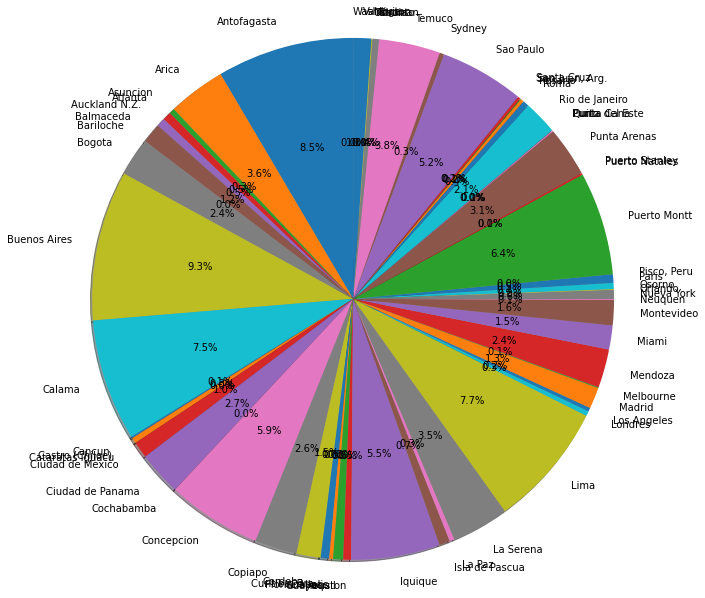

In [14]:
#Destinos - piechart
import matplotlib.pyplot as plt
data = np.unique(df['SIGLADES'], return_counts=True)
plt.pie(x = data[1], autopct='%.1f%%' ,
       labels = data[0],
       #colors =  ["Blue", "Red"],
       shadow = True,
       startangle = 90,
       radius = 3
       )
plt.show()  

**Los destinos principales son Buenos Aires 9,3%, Antofagasta 8,5%, Lima 7,7% y Calama con un 7,5% del total de vuelos**

In [15]:
#Aerolineas
aerolineas = pd.DataFrame(df.groupby(by = ["OPERA"])["OPERA"].count() / 68206)
aerolineas.rename(columns = {'OPERA':'Porc_Total'}, inplace = True)
aerolineas["n"] = df.groupby(by = ["OPERA"])["OPERA"].count()
aerolineas = aerolineas.sort_values('n',ascending=False)
aerolineas = aerolineas[aerolineas["n"] > 68206*0.01]
aerolineas

,Porc_Total,n
OPERA,,
Grupo LATAM,0.599537,40892
Sky Airline,0.209630,14298
Aerolineas Argentinas,0.028575,1949
Copa Air,0.027124,1850
Latin American Wings,0.024543,1674
Avianca,0.016890,1152
JetSmart SPA,0.016054,1095
Gol Trans,0.011817,806
American Airlines,0.011099,757


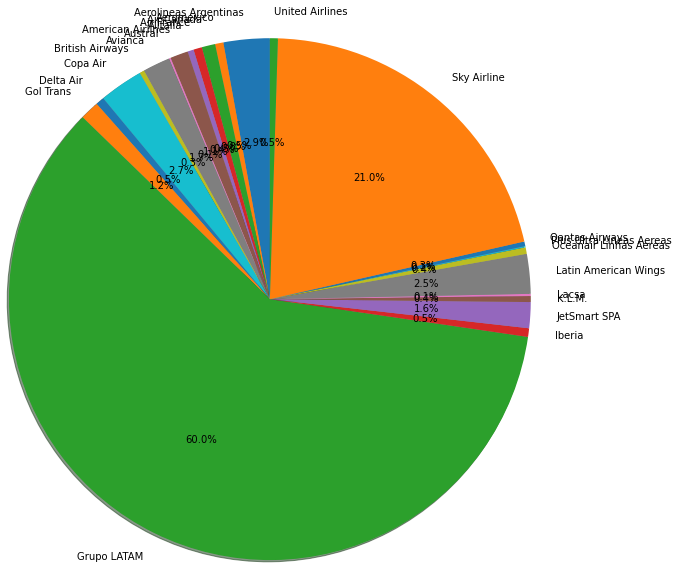

In [16]:
####Aerolineas - piechart
data = np.unique(df['OPERA'], return_counts=True)
plt.pie(x = data[1], autopct='%.1f%%' ,
       labels = data[0],
       #colors =  ["Blue", "Red"],
       shadow = True,
       startangle = 90,
       radius = 3
       )
plt.show()  

#Un 60% de los vuelos fue realizado por Grupo Latam, un 21% por Sky Airline y el resto de aerolineas solo un 19% del total

In [17]:
#Año
df[df["AÑO"] == 2018][["Fecha-I", "Fecha-O", "AÑO", "MES", "DIA", "DIANOM", "Fecha_I2"]]

,Fecha-I,Fecha-O,AÑO,MES,DIA,DIANOM,Fecha_I2
66918,2017-12-31 23:55:00,2018-01-01 00:02:00,2018,1,1,Lunes,2017-12-31 23:55:00
66947,2017-12-31 23:40:00,2018-01-01 00:12:00,2018,1,1,Lunes,2017-12-31 23:40:00


In [18]:
#MES y día
df["MES_I"] = pd.to_numeric(df['Fecha_I2'].astype(str).str[5:7])
#df[df["MES"] != df["MES_I"]][["MES_I", "Fecha-I", "Fecha-O"]] - 9 casos, pero se puede calcular

df["DIA_I"] = pd.to_numeric(df['Fecha_I2'].astype(str).str[8:10])
#df[df["DIA"] != df["DIA_I"]][["DIA","DIA_I", "DIANOM", "Fecha-I", "Fecha-O"]] - 306 Casos


**Las variables AÑO, MES, DIA y DIANOM, están calculadas con respecto a la Fecha y hora de operación del vuelo en lugar de la programada, si se quieren utilizar para predecir o estudiar cómo se compone la tasa de atraso por destino se deben calcular nuevamente**

In [19]:
#Diferentes Destinos
df[df["Des-I"] != df["Des-O"]][["Des-I", "Des-O", "SIGLADES"]].count()

Des-I       28
Des-O       28
SIGLADES    28
dtype: int64

In [20]:
#Destino programado distinto al Destino operado - supongo que es un error en los registros, se eliminan de la base de análisis
df[df["Des-I"] != df["Des-O"]][["Des-I", "Des-O", "SIGLADES"]]
df = df[df["Des-I"] == df["Des-O"]]
df.describe()

,DIA,MES,AÑO,Retraso,MES_I,DIA_I
count,68178.000000,68178.000000,68178.000000,68178.000000,68178.000000,68178.000000
mean,15.715788,6.622679,2017.000029,0.006322,6.622899,15.715333
std,8.783224,3.523311,0.005416,0.013400,3.523366,8.783564
min,1.000000,1.000000,2017.000000,-0.009722,1.000000,1.000000
25%,8.000000,3.000000,2017.000000,-0.000694,3.000000,8.000000
50%,16.000000,7.000000,2017.000000,0.002778,7.000000,16.000000
75%,23.000000,10.000000,2017.000000,0.008333,10.000000,23.000000
max,31.000000,12.000000,2018.000000,0.111806,12.000000,31.000000


In [21]:
#Destino programado distinto al Destino operado
df[df["Des-I"] != df["Des-O"]][["Des-I"]].count()/df[["Des-I"]].count() 

Des-I    0.0
dtype: float64

**Supongo que la diferencia entre el destino programado y el operado se debe a error en los registros, se elimina los 28 registros con problemas de la base de análisis**

# **2) Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv**

In [22]:
################## 2 synthetic_features.csv 

## Temporada Alta
df['mesdia'] = df["MES_I"]*100+df["DIA_I"]
#df[["mesdia","MES_I","DIA_I", 'Fecha_I2']].head(30)
#df[df["MES_I"] != df["MES"]][["mesdia","MES_I", "MES","DIA_I", 'Fecha_I2', "Fecha-I"]].head(30)

df['temporada_alta'] = np.where(
     df['mesdia'].between(1215, 1531, inclusive='both'),  1,  #Si está entre el 15 y el 31 de diciembre es temporada alta - Supongo ambas fechas inclusive
     
     np.where(
        df['mesdia'].between(101, 303, inclusive='both'), 1,  #Si está entre el 01 de enero y el 03 de marzo es temporada alta - Supongo ambas fechas inclusive
     
     np.where(
        df['mesdia'].between(715, 731, inclusive='both'), 1,  #Si está entre el 15 y el 31 de julio es temporada alta - Supongo ambas fechas inclusive
     
     np.where(
        df['mesdia'].between(911, 930, inclusive='both'), 1,  #Si está entre el 11 y el 30 de septiembre es temporada alta - Supongo ambas fechas inclusive
         0                                                  #Si no cumple ninguna de las condiciones anteriores entonces no es temporada alta
         
         
     )
)))

#tab = df.groupby(['temporada_alta', 'mesdia']).size() - verificacion
#tab - prueba

##Dif min
df["dif_min"] = (df["Fecha_O2"] - df["Fecha_I2"]) / np.timedelta64(1, 'm')
#df[["dif_min", "Retraso", "Fecha_I2", "Fecha_O2"]] - verificacion

##Atraso 15
df["atraso_15"] = np.where(df["dif_min"] > 15, 1, 0)
#df.groupby(by = ["atraso_15", "dif_min"]).size().head(40)  

##Periodo día
df["horamin"] = pd.to_numeric(df['Fecha_I2'].astype(str).str[11:13])*100  + pd.to_numeric(df['Fecha_I2'].astype(str).str[14:16])
#df[["horamin", "Fecha_I2"]][9000:9010] - verificacion

df["periodo_dia"] = np.where(
     df['horamin'].between(500, 1159, inclusive='both'),  'mañana',  #Si está entre las 5:00 y las 11:59 es de mañana 
     
     np.where(
        df['horamin'].between(1200, 1859, inclusive='both'), 'tarde',  #Si está entre las 5:00 y las 11:59 es de mañana 
     
     np.where(
        df['horamin'].between(1900, 2400, inclusive='both'), 'noche',  #Si está entre las 19:00 y las 24:00 es de noche 
     
     np.where(
        df['horamin'].between(0000, 459, inclusive='both'), 'noche',  #Si está entre las 00:00 y las 4:59 es de mañana 
         'error'                                                  #Si no cumple ninguna de las condiciones anteriores entonces es un error
         
         
     )
)))
#df[["periodo_dia", "horamin", "Fecha-I"]]  - verificacion
#df.groupby(by = ["periodo_dia"]).size() #- verificacion


####Exportar a csv delimitado por |
#Si quisiera exportar el archivo completo
df.to_csv("C:/Users/patri/challenge_ntt/synthetic_features.csv", index = False,sep = '|', encoding = 'utf-8') 

#Si quisiera exportar solo las columnas creadas
#df[["temporada_alta", "dif_min", "atraso_15", "periodo_dia"]].to_csv("C:/Users/patri/challenge_ntt/synthetic_features.csv", index = False,sep = '|', encoding = 'utf-8') 



# **3) ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?**

Text(0, 0.5, 'Ciudades')

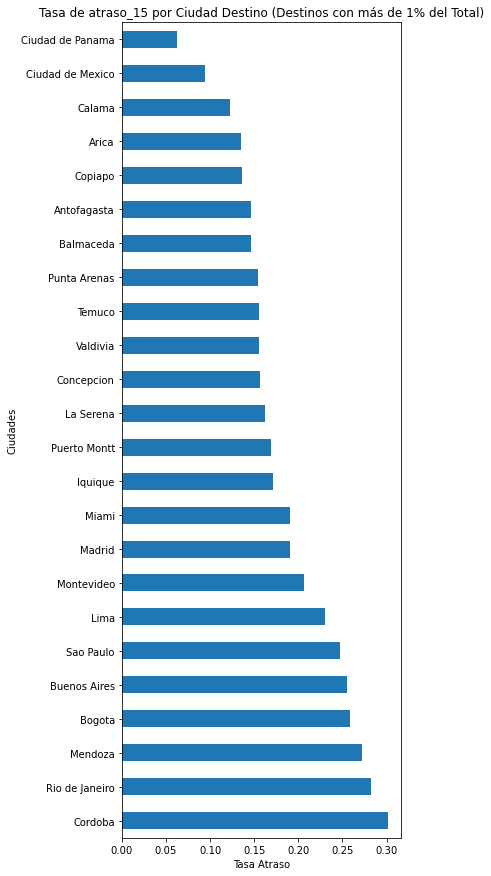

In [23]:
#Tasa de atrasos por destino
br_destino = pd.DataFrame(df.groupby(by = ["SIGLADES"])["atraso_15"].sum() / df.groupby(by = ["SIGLADES"])["atraso_15"].count())
br_destino["n"] = df.groupby(by = ["SIGLADES"])["atraso_15"].count()
br_destino = br_destino.sort_values('atraso_15',ascending=False)
br_destino_plot = br_destino[br_destino["n"] > df["Fecha-I"].size*0.01] #Solo para visualizar mejor, se considera  destinos con más de 1% del total

br_destino_plot["atraso_15"].plot(kind='barh', figsize=(5,15))
plt.title('Tasa de atraso_15 por Ciudad Destino (Destinos con más de 1% del Total)')
plt.xlabel('Tasa Atraso')
plt.ylabel('Ciudades')

In [24]:
br_destino_plot

,atraso_15,n
SIGLADES,,
Cordoba,0.301075,1023
Rio de Janeiro,0.282427,1434
Mendoza,0.272615,1625
Bogota,0.258728,1604
Buenos Aires,0.255571,6327
Sao Paulo,0.246848,3569
Lima,0.230361,5270
Montevideo,0.206379,1066
Madrid,0.190157,894


In [25]:
sum(br_destino_plot["n"])/df["SIGLADES"].count()

0.9138431752178122

In [26]:
br_destino_plot.describe()

,atraso_15,n
count,24.000000,24.00000
mean,0.183321,2596.00000
std,0.061470,1746.29247
min,0.062703,700.00000
25%,0.146549,1055.25000
50%,0.165146,1977.00000
75%,0.234482,3808.50000
max,0.301075,6327.00000


**Existen 24 destinos con un peso mayor al 1% de la muestra que van desde el 30,11% de a un 6,27% de Bad Rate, estos 24 destinos representan un 91,38% del total de registros, por lo que se esperaría que sea una variable influyente para predecir el retraso**

Text(0, 0.5, 'Aerolíneas')

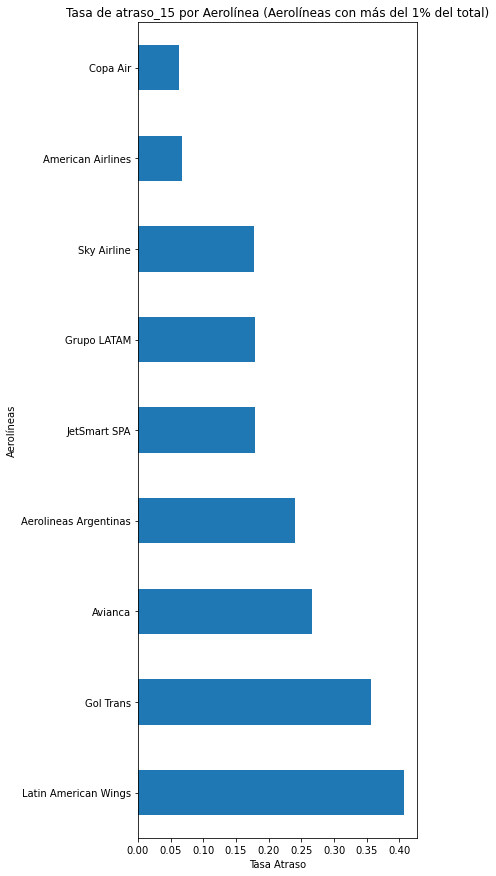

In [27]:
#Tasa de atrasos por aerolinea
br_aerolinea = pd.DataFrame(df.groupby(by = ["OPERA"])["atraso_15"].sum() / df.groupby(by = ["OPERA"])["atraso_15"].count())
br_aerolinea["n"] = df.groupby(by = ["OPERA"])["atraso_15"].count()
br_aerolinea = br_aerolinea.sort_values('atraso_15',ascending=False)
br_aerolinea_plot = br_aerolinea[br_aerolinea["n"] > df["Fecha-I"].size*0.01]

br_aerolinea_plot["atraso_15"].plot(kind='barh', figsize=(5,15))
plt.title('Tasa de atraso_15 por Aerolínea (Aerolíneas con más del 1% del total)')
plt.xlabel('Tasa Atraso')
plt.ylabel('Aerolíneas')

In [28]:
br_aerolinea_plot

,atraso_15,n
OPERA,,
Latin American Wings,0.406455,1673
Gol Trans,0.356522,805
Avianca,0.265625,1152
Aerolineas Argentinas,0.240123,1949
JetSmart SPA,0.178995,1095
Grupo LATAM,0.178622,40874
Sky Airline,0.177582,14292
American Airlines,0.067371,757
Copa Air,0.062703,1850


In [29]:
sum(br_aerolinea_plot["n"])/df["SIGLADES"].count()

0.9452756021003843

In [30]:
br_aerolinea_plot.describe()

,atraso_15,n
count,9.000000,9.000000
mean,0.214889,7160.777778
std,0.116665,13356.747955
min,0.062703,757.000000
25%,0.177582,1095.000000
50%,0.178995,1673.000000
75%,0.265625,1949.000000
max,0.406455,40874.000000


**Existen 9 aerolineas con un peso mayor al 1% de la muestra que van desde el 40,65% de a un 6,27% de Bad Rate, estas 9 aerolíneaa representan un 94,53% del total de registros, pero sabemos que el 81% de los vuelos fueron operados por Grupo LATAM O Sky Airline y ambas están en un rango medio de Bad Rate, por lo que se esperaría que no sea una variable tan influyente para predecir el retraso**

Text(0, 0.5, 'Ciudades')

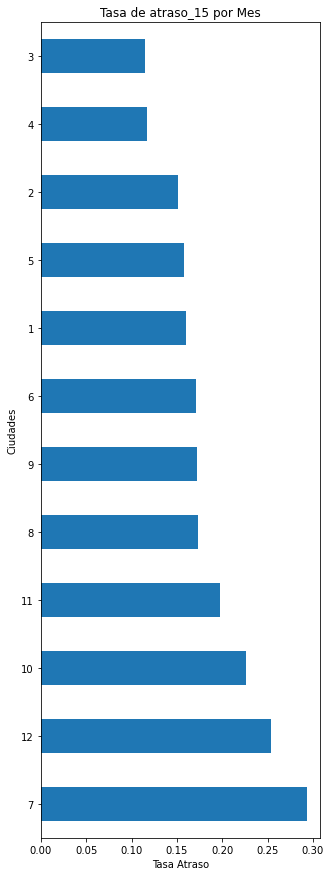

In [31]:
#Mes del Año
br_MES = pd.DataFrame(df.groupby(by = ["MES_I"])["atraso_15"].sum() / df.groupby(by = ["MES_I"])["atraso_15"].count())
br_MES["n"] = df.groupby(by = ["MES_I"])["atraso_15"].count()
br_MES = br_MES.sort_values('atraso_15',ascending=False)
br_MES_plot = br_MES[br_MES["n"] > df["Fecha-I"].size*0.01]

br_MES_plot["atraso_15"].plot(kind='barh', figsize=(5,15))
plt.title('Tasa de atraso_15 por Mes')
plt.xlabel('Tasa Atraso')
plt.ylabel('Ciudades')

In [32]:
br_MES_plot

,atraso_15,n
MES_I,,
7,0.293184,5986
12,0.254251,6352
10,0.225833,6031
11,0.197204,6080
8,0.173459,5742
9,0.172371,5610
6,0.171016,4982
1,0.160144,6107
5,0.157784,5235


**Se observa Tasa de Malos desde un 29,31% el peor mes hasta un 11,47% el peor, por lo que se espera que sea una variable influyente en el Modelo**

Text(0, 0.5, 'Día de la Semana')

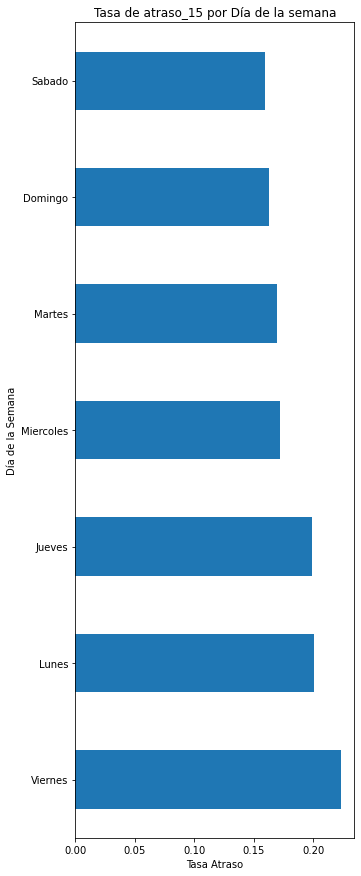

In [33]:
#Tasa de atrasos por dia semana
df['DIANOM_I'] = np.where(
     df['Fecha_I2'].dt.day_name() == "Monday",  'Lunes',   
     
     np.where(
         df['Fecha_I2'].dt.day_name() == "Tuesday", 'Martes',  
     
     np.where(
        df['Fecha_I2'].dt.day_name() == "Wednesday", 'Miercoles',  
     
     np.where(
        df['Fecha_I2'].dt.day_name() == "Thursday", 'Jueves',  
     
     np.where(
        df['Fecha_I2'].dt.day_name() == "Friday", 'Viernes',   
     
     np.where(
        df['Fecha_I2'].dt.day_name() == "Saturday", 'Sabado',  
     
     np.where(
        df['Fecha_I2'].dt.day_name() == "Sunday", 'Domingo',  
         'error'                                                  #Si no cumple ninguna de las condiciones anteriores entonces es un error
         
         
     )
))))))

#df[df["DIANOM_I"] != df["DIANOM"]][["Fecha-I", "Fecha-O","Fecha_I2", "DIANOM","DIANOM_I",]]
#df.groupby(by = ["DIANOM"])["atraso_15"].count()




br_dianom = pd.DataFrame(df.groupby(by = ["DIANOM_I"])["atraso_15"].sum() / df.groupby(by = ["DIANOM_I"])["atraso_15"].count())
br_dianom["n"] = df.groupby(by = ["DIANOM_I"])["atraso_15"].count()
br_dianom = br_dianom.sort_values('atraso_15',ascending=False)
br_dianom_plot = br_dianom[br_dianom["n"] > 68206*0.01]

br_dianom_plot["atraso_15"].plot(kind='barh', figsize=(5,15))
plt.title('Tasa de atraso_15 por Día de la semana')
plt.xlabel('Tasa Atraso')
plt.ylabel('Día de la Semana')


In [34]:
br_dianom_plot

,atraso_15,n
DIANOM_I,,
Viernes,0.223513,10326
Lunes,0.200852,10092
Jueves,0.199122,10245
Miercoles,0.171690,9721
Martes,0.169341,9661
Domingo,0.162649,9831
Sabado,0.159841,8302


**El día de la semana present Bad Rates que van desde el 15,98% al 22,35%, por lo tanto se espera que su influencia sea baja**

Text(0, 0.5, 'Temporada')

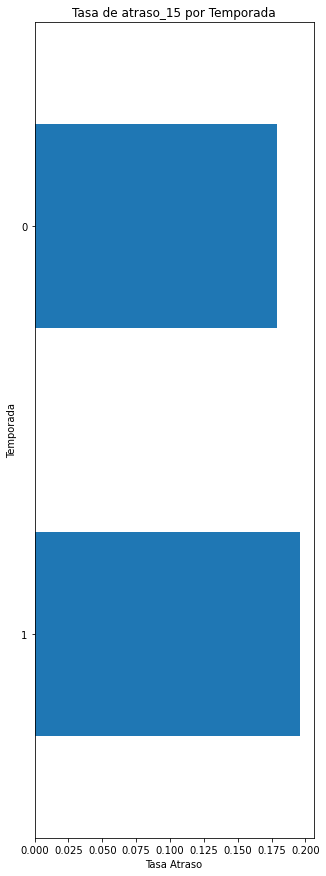

In [35]:
#Tasa de atrasos por temporada
br_temporada = pd.DataFrame(df.groupby(by = ["temporada_alta"])["atraso_15"].sum() / df.groupby(by = ["temporada_alta"])["atraso_15"].count())
br_temporada["n"] = df.groupby(by = ["temporada_alta"])["atraso_15"].count()
br_temporada = br_temporada.sort_values('atraso_15',ascending=False)
br_temporada_plot = br_temporada[br_temporada["n"] > 68206*0.01]

br_temporada_plot["atraso_15"].plot(kind='barh', figsize=(5,15))
plt.title('Tasa de atraso_15 por Temporada')
plt.xlabel('Tasa Atraso')
plt.ylabel('Temporada')


In [36]:
br_temporada_plot

,atraso_15,n
temporada_alta,,
1,0.196229,22754
0,0.179222,45424


**El Bad Rate de la temporada alta es 19,62%, mientras que la temporada baja es 17,92%, se espera que su influencia en la predicción de atrasos sea débil**

# **4) Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.**

In [37]:
df.groupby(by = ["atraso_15"])["atraso_15"].count()

atraso_15
0    55572
1    12606
Name: atraso_15, dtype: int64

In [38]:
#Camada
df["camada"] = pd.to_numeric(df['Fecha_I2'].astype(str).str[0:4])*100 + pd.to_numeric(df['Fecha_I2'].astype(str).str[5:7])
df[["Fecha-I", "Fecha_I2", "camada"]]

df.groupby(by = ["camada"]).size()

camada
201701    6107
201702    5558
201703    5476
201704    5019
201705    5235
201706    4982
201707    5986
201708    5742
201709    5610
201710    6031
201711    6080
201712    6352
dtype: int64

**Como solo se cuenta con un año de historia, no es recomendable utilizar muestra de validación OOT**

In [39]:
#Considerar aerolineas con menos de 1% del total como "Otro"
br_destino_plot=br_destino_plot.drop(columns = ['atraso_15'], axis=1)
br_destino_plot.rename(columns = {'n':'n_destino'}, inplace = True)
#br_destino_plot

#Left join
df = pd.merge(df,br_destino_plot, on = "SIGLADES", how="left")
#df

In [40]:
#df["n_destino"].isnull()

In [41]:
#Destino_2
df["Destino_2"] = np.where(
     df["n_destino"].isnull(),  'Otro',  df["SIGLADES"])

#df

In [42]:
#Aerolineas con menos de 1% como "Otro"
br_aerolinea_plot=br_aerolinea_plot.drop(columns = ['atraso_15'], axis=1)
br_aerolinea_plot.rename(columns = {'n':'n_aerolinea'}, inplace = True)
#br_aerolinea_plot

#Left join
df = pd.merge(df,br_aerolinea_plot, on = "OPERA", how="left")
#df

In [43]:
#Destino_2
df["Aerolinea_2"] = np.where(
     df["n_aerolinea"].isnull(),  'Otro',  df["OPERA"])


In [44]:
#Creación de muestras train/testing 75/25
np.random.seed(35)   #Para que se pueda recrear
df["aleatorio"] = np.random.rand(df["camada"].size,1)
df["aleatorio"].describe()

train = df[df["aleatorio"] <= 0.75]
test = df[df["aleatorio"] > 0.75]

train["aleatorio"].size+test["aleatorio"].size    #Verificación

68178

In [45]:
#Ranking Destino
br_destino = pd.DataFrame(train.groupby(by = ["Destino_2"])["atraso_15"].sum() / train.groupby(by = ["Destino_2"])["atraso_15"].count())
br_destino["n"] = train.groupby(by = ["Destino_2"])["atraso_15"].count()
br_destino = br_destino.sort_values('atraso_15',ascending=True)
br_destino["Destino_Rank"] = br_destino.reset_index().index
br_destino=br_destino.drop(columns = ['atraso_15','n'], axis=1)
#br_destino #Verificación

#Left join
df_aux = pd.merge(train,br_destino, on = "Destino_2", how="left")
train = df_aux

df_aux = pd.merge(test,br_destino, on = "Destino_2", how="left")
test = df_aux

df_aux = pd.merge(df,br_destino, on = "Destino_2", how="left")
df = df_aux

#train #Verificación
#test #Verificación

In [46]:
from scipy.stats import ks_2samp
ks_2samp(df["Destino_Rank"][df["atraso_15"]==0], df["Destino_Rank"][df["atraso_15"]==1])

KstestResult(statistic=0.14922709579535132, pvalue=3.3393233319358155e-200)

In [47]:
#Ranking Aerolinea
br_aerolinea = pd.DataFrame(train.groupby(by = ["Aerolinea_2"])["atraso_15"].sum() / train.groupby(by = ["Aerolinea_2"])["atraso_15"].count())
br_aerolinea["n"] = train.groupby(by = ["Aerolinea_2"])["atraso_15"].count()
br_aerolinea = br_aerolinea.sort_values('atraso_15',ascending=True)
br_aerolinea["Aerolinea_Rank"] = br_aerolinea.reset_index().index
br_aerolinea=br_aerolinea.drop(['atraso_15','n'], axis=1)
#br_aerolinea

#Left join
df_aux = pd.merge(train,br_aerolinea, on = "Aerolinea_2", how="left")
train = df_aux

df_aux = pd.merge(test,br_aerolinea, on = "Aerolinea_2", how="left")
test = df_aux

df_aux = pd.merge(df,br_aerolinea, on = "Aerolinea_2", how="left")
df = df_aux

#train #Verificacion
#test #Verificacion

In [48]:
from scipy.stats import ks_2samp
ks_2samp(df["Aerolinea_Rank"][df["atraso_15"]==0], df["Aerolinea_Rank"][df["atraso_15"]==1])

KstestResult(statistic=0.06904527987464404, pvalue=4.9002171984543286e-43)

In [49]:
#Mes del Año
br_MES = pd.DataFrame(train.groupby(by = ["MES_I"])["atraso_15"].sum() / train.groupby(by = ["MES_I"])["atraso_15"].count())
br_MES["n"] = train.groupby(by = ["MES_I"])["atraso_15"].count()
br_MES = br_MES.sort_values('atraso_15',ascending=True)
br_MES["Mes_Rank"] = br_MES.reset_index().index
br_MES=br_MES.drop(['atraso_15','n'], axis=1)
#br_MES #Verficacion

#Left join
df_aux = pd.merge(train,br_MES, on = "MES_I", how="left")
train = df_aux

df_aux = pd.merge(test,br_MES, on = "MES_I", how="left")
test = df_aux

df_aux = pd.merge(df,br_MES, on = "MES_I", how="left")
df = df_aux
#train #Verificacion
#test #Verificacion

In [50]:
from scipy.stats import ks_2samp
ks_2samp(df["Mes_Rank"][df["atraso_15"]==0], df["Mes_Rank"][df["atraso_15"]==1])

KstestResult(statistic=0.13726487744967797, pvalue=2.4915105368027306e-169)

In [51]:
#train.dtypes

In [52]:
#test.dtypes

In [53]:
#Prueba Dianom
#train.groupby(by = ["TIPOVUELO"])["atraso_15"].count()
#train.groupby(by = ["TIPOVUELO"])["atraso_15"].sum() / train.groupby(by = ["TIPOVUELO"])["atraso_15"].count()

br_DIANOM = pd.DataFrame(train.groupby(by = ["DIANOM_I"])["atraso_15"].sum() / train.groupby(by = ["DIANOM_I"])["atraso_15"].count())
br_DIANOM["n"] = train.groupby(by = ["DIANOM_I"])["atraso_15"].count()
br_DIANOM = br_DIANOM.sort_values('atraso_15',ascending=True)
br_DIANOM["DIANOM_Rank"] = br_DIANOM.reset_index().index
br_DIANOM=br_DIANOM.drop(['atraso_15','n'], axis=1)
#br_TIPOVUELO #Verficacion

#Left join
df_aux = pd.merge(train,br_DIANOM, on = "DIANOM_I", how="left")
train = df_aux

df_aux = pd.merge(test,br_DIANOM, on = "DIANOM_I", how="left")
test = df_aux

df_aux = pd.merge(df,br_DIANOM, on = "DIANOM_I", how="left")
df = df_aux
#train #Verficacion

In [54]:
from scipy.stats import ks_2samp
ks_2samp(df["DIANOM_Rank"][df["atraso_15"]==0], df["DIANOM_Rank"][df["atraso_15"]==1])

KstestResult(statistic=0.06865693409201135, pvalue=1.4743070576609177e-42)

In [55]:
#Prueba TIPOVUELO
#train.groupby(by = ["TIPOVUELO"])["atraso_15"].count()
#train.groupby(by = ["TIPOVUELO"])["atraso_15"].sum() / train.groupby(by = ["TIPOVUELO"])["atraso_15"].count()

br_TIPOVUELO = pd.DataFrame(train.groupby(by = ["TIPOVUELO"])["atraso_15"].sum() / train.groupby(by = ["TIPOVUELO"])["atraso_15"].count())
br_TIPOVUELO["n"] = train.groupby(by = ["TIPOVUELO"])["atraso_15"].count()
br_TIPOVUELO = br_TIPOVUELO.sort_values('atraso_15',ascending=True)
br_TIPOVUELO["TIPOVUELO_Rank"] = br_TIPOVUELO.reset_index().index
br_TIPOVUELO=br_TIPOVUELO.drop(['atraso_15','n'], axis=1)
#br_TIPOVUELO #Verficacion

#Left join
df_aux = pd.merge(train,br_TIPOVUELO, on = "TIPOVUELO", how="left")
train = df_aux

df_aux = pd.merge(test,br_TIPOVUELO, on = "TIPOVUELO", how="left")
test = df_aux

df_aux = pd.merge(df,br_TIPOVUELO, on = "TIPOVUELO", how="left")
df = df_aux
#train #Verficacion

In [56]:
from scipy.stats import ks_2samp
ks_2samp(df["TIPOVUELO_Rank"][df["atraso_15"]==0], df["TIPOVUELO_Rank"][df["atraso_15"]==1])

KstestResult(statistic=0.12353701419563051, pvalue=3.964473703253583e-137)

In [57]:
pd.DataFrame(train.groupby(by = ["temporada_alta"])["atraso_15"].sum() / train.groupby(by = ["temporada_alta"])["atraso_15"].count())

,atraso_15
temporada_alta,
0,0.178988
1,0.196042


In [58]:
#Prueba temporada_alta
br_temporada = pd.DataFrame(train.groupby(by = ["temporada_alta"])["atraso_15"].sum() / train.groupby(by = ["temporada_alta"])["atraso_15"].count())
br_temporada["n"] = train.groupby(by = ["temporada_alta"])["atraso_15"].count()
br_temporada = br_temporada.sort_values('atraso_15',ascending=True)
br_temporada["temporada_alta_Rank"] = br_temporada.reset_index().index
br_temporada=br_temporada.drop(['atraso_15','n'], axis=1)
#br_temporada #Verficacion

#Left join
df_aux = pd.merge(train,br_temporada, on = "temporada_alta", how="left")
train = df_aux

df_aux = pd.merge(test,br_temporada, on = "temporada_alta", how="left")
test = df_aux

df_aux = pd.merge(df,br_temporada, on = "temporada_alta", how="left")
df = df_aux
#train #Verfi

In [59]:
from scipy.stats import ks_2samp
ks_2samp(df["temporada_alta_Rank"][df["atraso_15"]==0], df["temporada_alta_Rank"][df["atraso_15"]==1])

KstestResult(statistic=0.02509182936301113, pvalue=4.721458706052107e-06)

In [60]:
#Prueba periodo_dia
br_periodo_dia = pd.DataFrame(train.groupby(by = ["periodo_dia"])["atraso_15"].sum() / train.groupby(by = ["periodo_dia"])["atraso_15"].count())
br_periodo_dia["n"] = train.groupby(by = ["periodo_dia"])["atraso_15"].count()
br_periodo_dia = br_periodo_dia.sort_values('atraso_15',ascending=True)
br_periodo_dia["periodo_dia_Rank"] = br_periodo_dia.reset_index().index
br_periodo_dia=br_periodo_dia.drop(['atraso_15','n'], axis=1)
#br_periodo_dia #Verficacion

#Left join
df_aux = pd.merge(train,br_periodo_dia, on = "periodo_dia", how="left")
train = df_aux

df_aux = pd.merge(test,br_periodo_dia, on = "periodo_dia", how="left")
test = df_aux

df_aux = pd.merge(df,br_periodo_dia, on = "periodo_dia", how="left")
df = df_aux

In [61]:
from scipy.stats import ks_2samp
ks_2samp(df["periodo_dia_Rank"][df["atraso_15"]==0], df["periodo_dia_Rank"][df["atraso_15"]==1])

KstestResult(statistic=0.061308418153252775, pvalue=5.131540850904886e-34)

In [62]:
#train.dtypes

In [63]:
#Prueba Dia
br_diadmes = pd.DataFrame(train.groupby(by = ["DIA_I"])["atraso_15"].sum() / train.groupby(by = ["DIA_I"])["atraso_15"].count())
br_diadmes["n"] = train.groupby(by = ["DIA_I"])["atraso_15"].count()
br_diadmes = br_diadmes.sort_values('atraso_15',ascending=True)
br_diadmes["diadmes_Rank"] = br_diadmes.reset_index().index
br_diadmes=br_diadmes.drop(['atraso_15','n'], axis=1)
#br_diadmes #Verficacion

#Left join
df_aux = pd.merge(train,br_diadmes, on = "DIA_I", how="left")
train = df_aux

df_aux = pd.merge(test,br_diadmes, on = "DIA_I", how="left")
test = df_aux

df_aux = pd.merge(df,br_diadmes, on = "DIA_I", how="left")
df = df_aux

In [64]:
from scipy.stats import ks_2samp
ks_2samp(df["diadmes_Rank"][df["atraso_15"]==0], df["diadmes_Rank"][df["atraso_15"]==1])

KstestResult(statistic=0.05732556566397712, pvalue=8.607830505373418e-30)

In [65]:
train.describe()

,DIA,MES,AÑO,Retraso,MES_I,DIA_I,mesdia,temporada_alta,dif_min,atraso_15,...,n_aerolinea,aleatorio,Destino_Rank,Aerolinea_Rank,Mes_Rank,DIANOM_Rank,TIPOVUELO_Rank,temporada_alta_Rank,periodo_dia_Rank,diadmes_Rank
count,51113.000000,51113.00000,51113.000000,51113.000000,51113.000000,51113.000000,51113.000000,51113.000000,51113.000000,51113.000000,...,48306.000000,51113.000000,51113.000000,51113.000000,51113.000000,51113.000000,51113.000000,51113.000000,51113.000000,51113.000000
mean,15.711306,6.62311,2017.000039,0.006298,6.623423,15.711580,678.053841,0.333125,9.069434,0.184669,...,29294.906927,0.376350,12.084988,3.964882,5.679064,3.108133,0.457261,0.333125,0.999765,15.250191
std,8.792937,3.52316,0.006255,0.013356,3.523221,8.793362,352.568822,0.471335,19.232916,0.388033,...,15699.673428,0.216645,6.698051,1.348756,3.466392,1.974736,0.498175,0.471335,0.864261,8.857848
min,1.000000,1.00000,2017.000000,-0.009722,1.000000,1.000000,101.000000,0.000000,-14.000000,0.000000,...,757.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,3.00000,2017.000000,-0.000694,3.000000,8.000000,331.000000,0.000000,-1.000000,0.000000,...,14292.000000,0.189072,5.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,8.000000
50%,16.000000,7.00000,2017.000000,0.002778,7.000000,16.000000,710.000000,0.000000,4.000000,0.000000,...,40874.000000,0.376682,12.000000,4.000000,6.000000,3.000000,0.000000,0.000000,1.000000,15.000000
75%,23.000000,10.00000,2017.000000,0.008333,10.000000,23.000000,1008.000000,1.000000,12.000000,0.000000,...,40874.000000,0.564040,18.000000,4.000000,9.000000,5.000000,1.000000,1.000000,2.000000,23.000000
max,31.000000,12.00000,2018.000000,0.111806,12.000000,31.000000,1231.000000,1.000000,161.000000,1.000000,...,40874.000000,0.749982,24.000000,9.000000,11.000000,6.000000,1.000000,1.000000,2.000000,30.000000


**Regresion Logística**

In [66]:
# Matriz de correlación
# ==============================================================================
corr_matrix = train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]].corr(method='pearson')
corr_matrix

,Destino_Rank,Aerolinea_Rank,Mes_Rank,DIANOM_Rank,TIPOVUELO_Rank,temporada_alta_Rank,periodo_dia_Rank,diadmes_Rank
Destino_Rank,1.000000,0.355267,-0.004242,-0.032642,0.701168,0.002156,0.000365,-0.002384
Aerolinea_Rank,0.355267,1.000000,0.004080,0.012679,0.201170,-0.019175,0.006656,0.003329
Mes_Rank,-0.004242,0.004080,1.000000,-0.007163,-0.006810,-0.002496,0.006022,-0.004872
DIANOM_Rank,-0.032642,0.012679,-0.007163,1.000000,-0.047597,-0.002968,0.001012,0.003013
TIPOVUELO_Rank,0.701168,0.201170,-0.006810,-0.047597,1.000000,-0.004399,0.003158,-0.003447
temporada_alta_Rank,0.002156,-0.019175,-0.002496,-0.002968,-0.004399,1.000000,0.009702,0.011584
periodo_dia_Rank,0.000365,0.006656,0.006022,0.001012,0.003158,0.009702,1.000000,0.000626
diadmes_Rank,-0.002384,0.003329,-0.004872,0.003013,-0.003447,0.011584,0.000626,1.000000


In [67]:
#PRedictores 'Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank'
#Respuesta atraso_15
#Muestras de Desarrollo y validación - Reg Logistica
y_train = train["atraso_15"]
X_train = train

y_test = test["atraso_15"]
X_test = test  

In [68]:
#Defino el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression

modelo_rl = LogisticRegression()

#Entreno el modelo
modelo_rl.fit(X_train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]], y_train) #Se Elimina tipo de vuelo ya que presenta una correlación de 0,7 con Destino

#Realizo una predicción
y_pred = modelo_rl.predict(X_test[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]) #Se Elimina tipo de vuelo ya que presenta una correlación de 0,7 con Destino

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[13870    28]
 [ 3129    38]]


In [69]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]].values, i) for i in range(X_train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]].shape[1])]
vif["features"] = X_train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]].columns
vif.round(1)

,VIF Factor,features
0,4.7,Destino_Rank
1,7.9,Aerolinea_Rank
2,3.2,Mes_Rank
3,3.1,DIANOM_Rank
4,1.5,temporada_alta_Rank
5,2.2,periodo_dia_Rank
6,3.4,diadmes_Rank


In [70]:
#Pego predicciones en bases de datos para después evaluar
train["Prob_RL"] = pd.DataFrame(modelo_rl.predict_proba(X_train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]))[1]

train['Pred_RL'] = np.where(
     train['Prob_RL'] > 0.5,  1, 0)

test["Prob_RL"] = pd.DataFrame(modelo_rl.predict_proba(X_test[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]))[1]

test['Pred_RL'] = np.where(
     test['Prob_RL'] > 0.5,  1, 0)

df["Prob_RL"] = pd.DataFrame(modelo_rl.predict_proba(df[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]))[1]

df['Pred_RL'] = np.where(
     df['Prob_RL'] > 0.5,  1, 0)

In [71]:
from scipy.stats import ks_2samp
ks_2samp(test["Prob_RL"][test["atraso_15"]==0], test["Prob_RL"][test["atraso_15"]==1])

KstestResult(statistic=0.20594224700752928, pvalue=2.115823854536154e-96)

In [72]:
#Defino el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression

modelo_rl2 = LogisticRegression()

#Entreno el modelo
modelo_rl2.fit(X_train[['TIPOVUELO_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]], y_train) #Reemplazo Destino por TIPOVUELO

#Realizo una predicción
y_pred = modelo_rl2.predict(X_test[['TIPOVUELO_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]) #Reemplazo Destino por TIPOVUELO

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[13865    33]
 [ 3128    39]]


In [73]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train[['TIPOVUELO_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]].values, i) for i in range(X_train[['TIPOVUELO_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]].shape[1])]
vif["features"] = X_train[['TIPOVUELO_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]].columns
vif.round(1)

,VIF Factor,features
0,1.9,TIPOVUELO_Rank
1,6.1,Aerolinea_Rank
2,3.2,Mes_Rank
3,3.1,DIANOM_Rank
4,1.5,temporada_alta_Rank
5,2.2,periodo_dia_Rank
6,3.4,diadmes_Rank


In [74]:
#Pego predicciones en bases de datos para después evaluar
train["Prob_RL2"] = pd.DataFrame(modelo_rl2.predict_proba(X_train[['TIPOVUELO_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]))[1]

train['Pred_RL2'] = np.where(
     train['Prob_RL2'] > 0.5,  1, 0)

test["Prob_RL2"] = pd.DataFrame(modelo_rl2.predict_proba(X_test[['TIPOVUELO_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]))[1]

test['Pred_RL2'] = np.where(
     test['Prob_RL2'] > 0.5,  1, 0)

df["Prob_RL2"] = pd.DataFrame(modelo_rl2.predict_proba(df[['TIPOVUELO_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]))[1]

df['Pred_RL2'] = np.where(
     df['Prob_RL2'] > 0.5,  1, 0)

In [75]:
from scipy.stats import ks_2samp
ks_2samp(test["Prob_RL2"][test["atraso_15"]==0], test["Prob_RL2"][test["atraso_15"]==1])

KstestResult(statistic=0.20058934045297233, pvalue=1.967788987734217e-91)

In [76]:
#Modelo RL3
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

modelo_rl3 = LogisticRegression()
modelo_rl3.fit(X_train[['TIPOVUELO_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]],y_train)

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[13865    33]
 [ 3128    39]]


In [77]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train[['TIPOVUELO_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]].values, i) for i in range(X_train[['TIPOVUELO_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]].shape[1])]
vif["features"] = X_train[['TIPOVUELO_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]].columns
vif.round(1)

,VIF Factor,features
0,1.7,TIPOVUELO_Rank
1,2.8,Mes_Rank
2,2.7,DIANOM_Rank
3,1.4,temporada_alta_Rank
4,2.1,periodo_dia_Rank
5,3.0,diadmes_Rank


In [78]:
#Pego predicciones en bases de datos para después evaluar
train["Prob_RL3"] = pd.DataFrame(modelo_rl3.predict_proba(X_train[['TIPOVUELO_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]))[1]

train['Pred_RL3'] = np.where(
     train['Prob_RL3'] > 0.5,  1, 0)

test["Prob_RL3"] = pd.DataFrame(modelo_rl3.predict_proba(X_test[['TIPOVUELO_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]))[1]

test['Pred_RL3'] = np.where(
     test['Prob_RL3'] > 0.5,  1, 0)

df["Prob_RL3"] = pd.DataFrame(modelo_rl3.predict_proba(df[['TIPOVUELO_Rank', 'Mes_Rank', 'DIANOM_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]))[1]

df['Pred_RL3'] = np.where(
     df['Prob_RL3'] > 0.5,  1, 0)

In [79]:
from scipy.stats import ks_2samp
ks_2samp(df["Prob_RL3"][df["atraso_15"]==0], df["Prob_RL3"][df["atraso_15"]==1])

KstestResult(statistic=0.20317437347445677, pvalue=0.0)

**Naive Bayes**

In [80]:
#Como Naive Bayes no tiene tantas restricciones como la regresión lineal, se vuelve a generar X_train y X_test
X_train = train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]

X_test = test[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]

In [81]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [82]:
#Modelo Bernoulli
modelo_NB = BernoulliNB()
#clf = MultinomialNB()
modelo_NB.fit(X_train,y_train)
Y_pred = pd.DataFrame(modelo_NB.predict_proba(X_train))[1]


In [83]:
#Pego predicciones en bases de datos para después evaluar
train["Prob_NB"] = pd.DataFrame(modelo_NB.predict_proba(X_train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]

train['Pred_NB'] = np.where(
     train['Prob_NB'] > 0.5,  1, 0)

test["Prob_NB"] = pd.DataFrame(modelo_NB.predict_proba(X_test[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]

test['Pred_NB'] = np.where(
     test['Prob_NB'] > 0.5,  1, 0)

df["Prob_NB"] = pd.DataFrame(modelo_NB.predict_proba(df[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]

df['Pred_NB'] = np.where(
     df['Prob_NB'] > 0.5,  1, 0)
#df

In [84]:
from scipy.stats import ks_2samp
ks_2samp(df["Prob_NB"][df["atraso_15"]==0], df["Prob_NB"][df["atraso_15"]==1])

KstestResult(statistic=0.15522290218849155, pvalue=1.147533263518002e-216)

**Árbol de Decisión**

In [85]:
#Árbol de Decisión para comparar con Random Forest
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
arbol_dec = tree.DecisionTreeClassifier()

arbol_dec = arbol_dec.fit(X_train,y_train)

In [86]:
#Pego predicciones en bases de datos para después evaluar
train["Prob_DT"] = pd.DataFrame(arbol_dec.predict_proba(X_train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]

train['Pred_DT'] = np.where(
     train['Prob_DT'] > 0.5,  1, 0)

test["Prob_DT"] = pd.DataFrame(arbol_dec.predict_proba(X_test[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]

test['Pred_DT'] = np.where(
     test['Prob_DT'] > 0.5,  1, 0)

df["Prob_DT"] = pd.DataFrame(arbol_dec.predict_proba(df[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]

df['Pred_DT'] = np.where(
     df['Prob_DT'] > 0.5,  1, 0)
#df

In [87]:
from scipy.stats import ks_2samp
ks_2samp(test["Prob_DT"][test["atraso_15"]==0], test["Prob_DT"][test["atraso_15"]==1])

KstestResult(statistic=0.14240831175468815, pvalue=4.238226341421116e-46)

**Random Forest**

In [88]:
#Random Forest
rdm_forest = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
rdm_forest.fit(X_train,y_train)
Y_pred_test = rdm_forest.predict(X_test)

In [89]:
#Pego predicciones en bases de datos para después evaluar
train["Prob_RF"] = pd.DataFrame(rdm_forest.predict_proba(X_train))[1]

train['Pred_RF'] = np.where(
     train['Prob_RF'] > 0.5,  1, 0)

test["Prob_RF"] = pd.DataFrame(rdm_forest.predict_proba(X_test))[1]

test['Pred_RF'] = np.where(
     test['Prob_RF'] > 0.5,  1, 0)

df["Prob_RF"] = pd.DataFrame(rdm_forest.predict_proba(df[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]

df['Pred_RF'] = np.where(
     df['Prob_RF'] > 0.5,  1, 0)
#df

In [90]:
from scipy.stats import ks_2samp
ks_2samp(test["Prob_RF"][test["atraso_15"]==0], test["Prob_RF"][test["atraso_15"]==1])

KstestResult(statistic=0.23544069078685648, pvalue=3.1090420126716885e-126)

**XGBoost**

In [91]:
from numpy import loadtxt
from xgboost import XGBClassifier

C:\Users\patri\anaconda3_v2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [92]:
#df.dtypes

In [93]:
# fit model on training data
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

C:\Users\patri\anaconda3_v2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\patri\anaconda3_v2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:03:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
# make predictions for test data
y_pred = model_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

In [95]:
#Se Agrega probabilidad estimada con xgb a df, train y test
train["Prob_XGB1"] = pd.DataFrame(model_xgb.predict_proba(train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]
test["Prob_XGB1"] = pd.DataFrame(model_xgb.predict_proba(test[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]
df["Prob_XGB1"] = pd.DataFrame(model_xgb.predict_proba(df[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]

In [96]:
from scipy.stats import ks_2samp
ks_2samp(test["Prob_XGB1"][test["atraso_15"]==0], test["Prob_XGB1"][test["atraso_15"]==1])

KstestResult(statistic=0.29229221715177517, pvalue=1.096972655270055e-195)

In [97]:
from scipy.stats import ks_2samp
ks_2samp(train["Prob_XGB1"][train["atraso_15"]==0], train["Prob_XGB1"][train["atraso_15"]==1])

KstestResult(statistic=0.47120282569223215, pvalue=0.0)

In [98]:
#XGBoost 2 Modificando Hiper parámetros
model_xgb2 = XGBClassifier(#base_score=0.5,  Se estima automáticamente por defecto 
                          booster='gbtree', #Booster que se va a usar, puede ser gbtree, gblinear or dart
                          colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, #Muestreo de columnas
                          enable_categorical=False,
                          gamma=0.01, #Llamado también min_split_loss
                          gpu_id=-1, 
                          interaction_constraints='', #Restricciones a las interacciones
                          learning_rate=0.2,   #También llamado eta, velocidad a la que aprende cada vez que hace un árbol
                          max_delta_step=0,            #Delta máximo en cada paso, para poner restricciones es recomendable de 1-10
                          max_depth=3,                 #Máxima profundidad por árbol
                          min_child_weight=1,          #Minimum sum of instance weight (hessian) needed in a child
                          monotone_constraints='()', 
                          n_estimators=500,            
                          n_jobs=-1,
                          num_parallel_tree=1,        #Number of paralell trees
                          predictor='auto',           #The type of predictor algorithm to use. Provides the same results but allows the use of GPU or CPU.
                          subsample=1,
                          tree_method='exact', 
                          validate_parameters=1, 
                          verbosity= 0,                #Mensajes - Verbosity of printing messages. Valid values of 0 (silent), 1 (warning), 2 (info), and 3 (debug). | None por defecto
                          eval_metric = "aucpr")
model_xgb2.fit(X_train, y_train)

C:\Users\patri\anaconda3_v2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\patri\anaconda3_v2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='aucpr', gamma=0.01, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [99]:
#Se Agrega probabilidad estimada con xgb a df, train y test
train["Prob_XGB2"] = pd.DataFrame(model_xgb2.predict_proba(train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]
test["Prob_XGB2"] = pd.DataFrame(model_xgb2.predict_proba(test[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]
df["Prob_XGB2"] = pd.DataFrame(model_xgb2.predict_proba(df[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]

In [100]:
from scipy.stats import ks_2samp
ks_2samp(test["Prob_XGB2"][test["atraso_15"]==0], test["Prob_XGB2"][test["atraso_15"]==1])

KstestResult(statistic=0.28485840475260166, pvalue=1.081578409886009e-185)

In [101]:
from scipy.stats import ks_2samp
ks_2samp(train["Prob_XGB2"][train["atraso_15"]==0], train["Prob_XGB2"][train["atraso_15"]==1])

KstestResult(statistic=0.40384716593301545, pvalue=0.0)

In [102]:
#XGBoost 3 Modificando Hiper parámetros
model_xgb3 = XGBClassifier(#base_score=0.5,  Se estima automáticamente por defecto 
                          booster='gbtree', #Booster que se va a usar, puede ser gbtree, gblinear or dart
                          colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, #Muestreo de columnas
                          enable_categorical=False,
                          gamma=0.01,                  #Llamado también min_split_loss
                          gpu_id=-1, 
                          interaction_constraints='',  #Restricciones a las interacciones
                          learning_rate= .5,           #También llamado eta, velocidad a la que aprende cada vez que hace un árbol
                          max_delta_step=0,            #Delta máximo en cada paso, para poner restricciones es recomendable de 1-10
                          max_depth=3,                 #Máxima profundidad por árbol
                          min_child_weight=1,          #Minimum sum of instance weight (hessian) needed in a child
                          monotone_constraints='()', 
                          n_estimators=2000,            
                          n_jobs=-1,
                          num_parallel_tree=2,         #Number of paralell trees
                          predictor='auto',            #The type of predictor algorithm to use. Provides the same results but allows the use of GPU or CPU.
                          subsample=1,
                          tree_method='exact', 
                          validate_parameters=1, 
                          verbosity= 0,                #Mensajes - Verbosity of printing messages. Valid values of 0 (silent), 1 (warning), 2 (info), and 3 (debug). | None por defecto
                          eval_metric = "aucpr")
model_xgb3.fit(X_train, y_train)

C:\Users\patri\anaconda3_v2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\patri\anaconda3_v2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='aucpr', gamma=0.01, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=-1,
              num_parallel_tree=2, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [103]:
#Se Agrega probabilidad estimada con xgb a df, train y test
train["Prob_XGB3"] = pd.DataFrame(model_xgb3.predict_proba(train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]
test["Prob_XGB3"] = pd.DataFrame(model_xgb3.predict_proba(test[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]
df["Prob_XGB3"] = pd.DataFrame(model_xgb3.predict_proba(df[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]

In [104]:
from scipy.stats import ks_2samp
ks_2samp(test["Prob_XGB3"][test["atraso_15"]==0], test["Prob_XGB3"][test["atraso_15"]==1])

KstestResult(statistic=0.26403632800716015, pvalue=3.585594217184333e-159)

In [105]:
from scipy.stats import ks_2samp
ks_2samp(train["Prob_XGB3"][train["atraso_15"]==0], train["Prob_XGB3"][train["atraso_15"]==1])

KstestResult(statistic=0.6678751837059875, pvalue=0.0)

In [106]:
#XGBoost 4 Modificando Hiper parámetros
model_xgb4 = XGBClassifier(#base_score=0.5,  Se estima automáticamente por defecto 
                          booster='gbtree', #Booster que se va a usar, puede ser gbtree, gblinear or dart
                          colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8, #Muestreo de columnas
                          enable_categorical=False,
                          gamma=0.01,                  #Llamado también min_split_loss
                          gpu_id=-1, 
                          interaction_constraints='',  #Restricciones a las interacciones
                          learning_rate= .3,           #También llamado eta, velocidad a la que aprende cada vez que hace un árbol
                          max_delta_step=0,            #Delta máximo en cada paso, para poner restricciones es recomendable de 1-10
                          max_depth=3,                 #Máxima profundidad por árbol
                          min_child_weight=1,          #Minimum sum of instance weight (hessian) needed in a child
                          monotone_constraints='()', 
                          n_estimators=30,            
                          n_jobs=-1,
                          num_parallel_tree=2,         #Number of paralell trees
                          predictor='auto',            #The type of predictor algorithm to use. Provides the same results but allows the use of GPU or CPU.
                          subsample=1,
                          tree_method='exact', 
                          validate_parameters=1, 
                          verbosity= 0,                #Mensajes - Verbosity of printing messages. Valid values of 0 (silent), 1 (warning), 2 (info), and 3 (debug). | None por defecto
                          eval_metric = "aucpr")
model_xgb4.fit(X_train, y_train)

C:\Users\patri\anaconda3_v2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\patri\anaconda3_v2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='aucpr', gamma=0.01,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=-1, num_parallel_tree=2, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=0)

In [107]:
#Se Agrega probabilidad estimada con xgb a df, train y test
train["Prob_XGB4"] = pd.DataFrame(model_xgb4.predict_proba(train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]
test["Prob_XGB4"] = pd.DataFrame(model_xgb4.predict_proba(test[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]
df["Prob_XGB4"] = pd.DataFrame(model_xgb4.predict_proba(df[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank", "Prob_RL", "Prob_RL2", "Prob_RL3"]]))[1]

In [108]:
from scipy.stats import ks_2samp
ks_2samp(test["Prob_XGB4"][test["atraso_15"]==0], test["Prob_XGB4"][test["atraso_15"]==1])

KstestResult(statistic=0.24290003995459175, pvalue=1.9279875375786245e-134)

In [109]:
from scipy.stats import ks_2samp
ks_2samp(train["Prob_XGB4"][train["atraso_15"]==0], train["Prob_XGB4"][train["atraso_15"]==1])

KstestResult(statistic=0.274218947127346, pvalue=0.0)

In [110]:
#XGBoost 5 Modificando Hiper parámetros - Sin Ensamble
model_xgb5 = XGBClassifier(#base_score=0.5,  Se estima automáticamente por defecto 
                          booster='gbtree', #Booster que se va a usar, puede ser gbtree, gblinear or dart
                          colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8, #Muestreo de columnas
                          enable_categorical=False,
                          gamma=0.01,                  #Llamado también min_split_loss
                          gpu_id=-1, 
                          interaction_constraints='',  #Restricciones a las interacciones
                          learning_rate= .3,           #También llamado eta, velocidad a la que aprende cada vez que hace un árbol
                          max_delta_step=0,            #Delta máximo en cada paso, para poner restricciones es recomendable de 1-10
                          max_depth=3,                 #Máxima profundidad por árbol
                          min_child_weight=1,          #Minimum sum of instance weight (hessian) needed in a child
                          monotone_constraints='()', 
                          n_estimators=30,            
                          n_jobs=-1,
                          num_parallel_tree=2,         #Number of paralell trees
                          predictor='auto',            #The type of predictor algorithm to use. Provides the same results but allows the use of GPU or CPU.
                          subsample=1,
                          tree_method='exact', 
                          validate_parameters=1, 
                          verbosity= 0,                #Mensajes - Verbosity of printing messages. Valid values of 0 (silent), 1 (warning), 2 (info), and 3 (debug). | None por defecto
                          eval_metric = "aucpr")
model_xgb5.fit(X_train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]], y_train)

C:\Users\patri\anaconda3_v2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\patri\anaconda3_v2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='aucpr', gamma=0.01,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=-1, num_parallel_tree=2, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=0)

In [111]:
#Se Agrega probabilidad estimada con xgb a df, train y test
train["Prob_XGB5"] = pd.DataFrame(model_xgb5.predict_proba(train[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]))[1]
test["Prob_XGB5"] = pd.DataFrame(model_xgb5.predict_proba(test[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]))[1]
df["Prob_XGB5"] = pd.DataFrame(model_xgb5.predict_proba(df[['Destino_Rank', 'Aerolinea_Rank', 'Mes_Rank', 'DIANOM_Rank', 'TIPOVUELO_Rank', "temporada_alta_Rank", "periodo_dia_Rank", "diadmes_Rank"]]))[1]

In [113]:
from scipy.stats import ks_2samp
ks_2samp(test["Prob_XGB5"][test["atraso_15"]==0], test["Prob_XGB5"][test["atraso_15"]==1])

KstestResult(statistic=0.25801276320422467, pvalue=6.694346870728345e-152)

In [114]:
from scipy.stats import ks_2samp
ks_2samp(train["Prob_XGB5"][train["atraso_15"]==0], train["Prob_XGB5"][train["atraso_15"]==1])

KstestResult(statistic=0.280789643635285, pvalue=0.0)

# **5) Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?**

In [116]:
from sklearn.metrics import roc_auc_score
Indicadores =pd.DataFrame()
Indicadores['KS Entrenamiento'] = None
Indicadores['KS Validación'] = None
Indicadores['KS Muestra Completa'] = None
Indicadores['AUC Entrenamiento'] = None
Indicadores['AUC Validación'] = None
Indicadores['AUC Muestra Completa'] = None
Indicadores


# Añadimos filas por su nombre de fila
Indicadores.loc['Regresión Logística 1'] = [ks_2samp(train["Prob_RL"][train["atraso_15"]==0], train["Prob_RL"][train["atraso_15"]==1]).statistic, ks_2samp(test["Prob_RL"][test["atraso_15"]==0], test["Prob_RL"][test["atraso_15"]==1]).statistic, ks_2samp(df["Prob_RL"][df["atraso_15"]==0], df["Prob_RL"][df["atraso_15"]==1]).statistic, roc_auc_score(train["atraso_15"], train["Prob_RL"]), roc_auc_score(test["atraso_15"], test["Prob_RL"]), roc_auc_score(df["atraso_15"], df["Prob_RL"])]
Indicadores.loc['Regresión Logística 2'] = [ks_2samp(train["Prob_RL2"][train["atraso_15"]==0], train["Prob_RL2"][train["atraso_15"]==1]).statistic, ks_2samp(test["Prob_RL2"][test["atraso_15"]==0], test["Prob_RL2"][test["atraso_15"]==1]).statistic, ks_2samp(df["Prob_RL2"][df["atraso_15"]==0], df["Prob_RL2"][df["atraso_15"]==1]).statistic, roc_auc_score(train["atraso_15"], train["Prob_RL2"]), roc_auc_score(test["atraso_15"], test["Prob_RL2"]), roc_auc_score(df["atraso_15"], df["Prob_RL2"])]
Indicadores.loc['Regresión Logística 3'] = [ks_2samp(train["Prob_RL3"][train["atraso_15"]==0], train["Prob_RL3"][train["atraso_15"]==1]).statistic, ks_2samp(test["Prob_RL3"][test["atraso_15"]==0], test["Prob_RL3"][test["atraso_15"]==1]).statistic, ks_2samp(df["Prob_RL3"][df["atraso_15"]==0], df["Prob_RL3"][df["atraso_15"]==1]).statistic, roc_auc_score(train["atraso_15"], train["Prob_RL3"]), roc_auc_score(test["atraso_15"], test["Prob_RL3"]), roc_auc_score(df["atraso_15"], df["Prob_RL3"])]
Indicadores.loc['Clasificador Naïve Bayes'] = [ks_2samp(train["Prob_NB"][train["atraso_15"]==0], train["Prob_NB"][train["atraso_15"]==1]).statistic, ks_2samp(test["Prob_NB"][test["atraso_15"]==0], test["Prob_NB"][test["atraso_15"]==1]).statistic, ks_2samp(df["Prob_NB"][df["atraso_15"]==0], df["Prob_NB"][df["atraso_15"]==1]).statistic, roc_auc_score(train["atraso_15"], train["Prob_NB"]), roc_auc_score(test["atraso_15"], test["Prob_NB"]), roc_auc_score(df["atraso_15"], df["Prob_NB"])]
Indicadores.loc['Árbol de Decisión'] = [ks_2samp(train["Prob_DT"][train["atraso_15"]==0], train["Prob_DT"][train["atraso_15"]==1]).statistic, ks_2samp(test["Prob_DT"][test["atraso_15"]==0], test["Prob_DT"][test["atraso_15"]==1]).statistic, ks_2samp(df["Prob_DT"][df["atraso_15"]==0], df["Prob_DT"][df["atraso_15"]==1]).statistic, roc_auc_score(train["atraso_15"], train["Prob_DT"]), roc_auc_score(test["atraso_15"], test["Prob_DT"]), roc_auc_score(df["atraso_15"], df["Prob_DT"])]
Indicadores.loc['Random Forest'] = [ks_2samp(train["Prob_RF"][train["atraso_15"]==0], train["Prob_RF"][train["atraso_15"]==1]).statistic, ks_2samp(test["Prob_RF"][test["atraso_15"]==0], test["Prob_RF"][test["atraso_15"]==1]).statistic, ks_2samp(df["Prob_RF"][df["atraso_15"]==0], df["Prob_RF"][df["atraso_15"]==1]).statistic, roc_auc_score(train["atraso_15"], train["Prob_RF"]), roc_auc_score(test["atraso_15"], test["Prob_RF"]), roc_auc_score(df["atraso_15"], df["Prob_RF"])]
Indicadores.loc['XGBoost 1'] = [ks_2samp(train["Prob_XGB1"][train["atraso_15"]==0], train["Prob_XGB1"][train["atraso_15"]==1]).statistic, ks_2samp(test["Prob_XGB1"][test["atraso_15"]==0], test["Prob_XGB1"][test["atraso_15"]==1]).statistic, ks_2samp(df["Prob_XGB1"][df["atraso_15"]==0], df["Prob_XGB1"][df["atraso_15"]==1]).statistic, roc_auc_score(train["atraso_15"], train["Prob_XGB1"]), roc_auc_score(test["atraso_15"], test["Prob_XGB1"]), roc_auc_score(df["atraso_15"], df["Prob_XGB1"])]
Indicadores.loc['XGBoost 2'] = [ks_2samp(train["Prob_XGB2"][train["atraso_15"]==0], train["Prob_XGB2"][train["atraso_15"]==1]).statistic, ks_2samp(test["Prob_XGB2"][test["atraso_15"]==0], test["Prob_XGB2"][test["atraso_15"]==1]).statistic, ks_2samp(df["Prob_XGB2"][df["atraso_15"]==0], df["Prob_XGB2"][df["atraso_15"]==1]).statistic, roc_auc_score(train["atraso_15"], train["Prob_XGB2"]), roc_auc_score(test["atraso_15"], test["Prob_XGB2"]), roc_auc_score(df["atraso_15"], df["Prob_XGB2"])]
Indicadores.loc['XGBoost 3'] = [ks_2samp(train["Prob_XGB3"][train["atraso_15"]==0], train["Prob_XGB3"][train["atraso_15"]==1]).statistic, ks_2samp(test["Prob_XGB3"][test["atraso_15"]==0], test["Prob_XGB3"][test["atraso_15"]==1]).statistic, ks_2samp(df["Prob_XGB3"][df["atraso_15"]==0], df["Prob_XGB3"][df["atraso_15"]==1]).statistic, roc_auc_score(train["atraso_15"], train["Prob_XGB3"]), roc_auc_score(test["atraso_15"], test["Prob_XGB3"]), roc_auc_score(df["atraso_15"], df["Prob_XGB3"])]
Indicadores.loc['XGBoost 4'] = [ks_2samp(train["Prob_XGB4"][train["atraso_15"]==0], train["Prob_XGB4"][train["atraso_15"]==1]).statistic, ks_2samp(test["Prob_XGB4"][test["atraso_15"]==0], test["Prob_XGB4"][test["atraso_15"]==1]).statistic, ks_2samp(df["Prob_XGB4"][df["atraso_15"]==0], df["Prob_XGB4"][df["atraso_15"]==1]).statistic, roc_auc_score(train["atraso_15"], train["Prob_XGB4"]), roc_auc_score(test["atraso_15"], test["Prob_XGB4"]), roc_auc_score(df["atraso_15"], df["Prob_XGB4"])]
Indicadores.loc['XGBoost 5'] = [ks_2samp(train["Prob_XGB5"][train["atraso_15"]==0], train["Prob_XGB5"][train["atraso_15"]==1]).statistic, ks_2samp(test["Prob_XGB5"][test["atraso_15"]==0], test["Prob_XGB5"][test["atraso_15"]==1]).statistic, ks_2samp(df["Prob_XGB5"][df["atraso_15"]==0], df["Prob_XGB5"][df["atraso_15"]==1]).statistic, roc_auc_score(train["atraso_15"], train["Prob_XGB5"]), roc_auc_score(test["atraso_15"], test["Prob_XGB5"]), roc_auc_score(df["atraso_15"], df["Prob_XGB5"])]
Indicadores

,KS Entrenamiento,KS Validación,KS Muestra Completa,AUC Entrenamiento,AUC Validación,AUC Muestra Completa
Regresión Logística 1,0.232227,0.205942,0.224455,0.659124,0.643775,0.655279
Regresión Logística 2,0.223167,0.200589,0.217486,0.651071,0.634756,0.646982
Regresión Logística 3,0.207323,0.191835,0.203174,0.638889,0.624319,0.635218
Clasificador Naïve Bayes,0.158664,0.150032,0.155223,0.610906,0.604159,0.609223
Árbol de Decisión,0.869776,0.142408,0.686406,0.980032,0.574630,0.873571
Random Forest,0.858837,0.235441,0.696754,0.978789,0.651023,0.910797
XGBoost 1,0.471203,0.292292,0.425264,0.819116,0.698522,0.789302
XGBoost 2,0.403847,0.284858,0.373390,0.776464,0.698764,0.757144
XGBoost 3,0.667875,0.264036,0.562243,0.919692,0.682184,0.861349
XGBoost 4,0.274219,0.242900,0.265639,0.692684,0.671250,0.687320


**Se escoge el modelo XGBoost 5 porque posee mejores índices KS y ROC sin tener una diferencia de más de 10 puntos de KS entre las muestras de entrenamiento y validación**

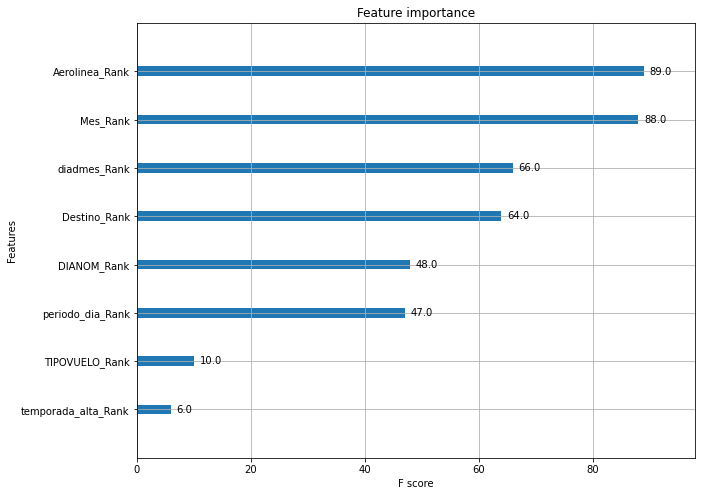

In [131]:
# feature importance
# plot feature importance
from xgboost import plot_importance
from matplotlib import pyplot
plt.rcParams["figure.figsize"] = (10, 8)
plot_importance(model_xgb5)
pyplot.show()

**La variable más importante es la Aerolínea, seguido del mes del viaje**

**Se Podría mejorar la performance del modelo de las siguientes maneras:**
    

**1) Añadiendo Historia: Tener una base de datos más completa apoyaría no solo en el ajuste, sino en el análisis de estabilidad del modelo y validaciónes con muestras OOT.**
   

 **2) Con Información complementaria de congestión del tráfico aéreo, condiciones climáticas desde donde viene el avión antes de llegar a Santiago, cierres de aeropuertos, restricciones de slots, mantenimientos de última hora, fallas en la planeación de itinerarios, tiempos medios por aerolínea en la preparación de los aviones para los despegues, etc**